In [1]:
%matplotlib inline
from preamble import *

## Reprezentacja danych i cechy inżynierskie

### Zmienne kategorialne

\begin{align*}
\end{align*}

#### Kodowanie jeden-z-N (zmienne fikcyjne)

In [2]:
import os
# Plik nie ma nagłówków z nazwami kolumn, więc przekazujemy
# header=None a nazwy kolumn podajemy jawnie w argumencie "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")
data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# W celach demonstracyjnych wybieramy tylko niektóre kolumny
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display umożliwia wygodne formatowanie danych wyjściowych w notatniku Jupyter
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


##### Sprawdzanie danych kategorialnych zakodowanych w postaci ciągów znaków

In [3]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
print("Cechy oryginalne:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Cechy po wywołaniy funkcji get_dummies:\n", list(data_dummies.columns))

Cechy oryginalne:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Cechy po wywołaniy funkcji get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ M

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [6]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# wyodrębnij tablice NumPy
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Wynik na zestwie testowym: {:.2f}".format(logreg.score(X_test, y_test)))

Wynik na zestwie testowym: 0.81


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Liczby mogą kodować zmienne kategorialne

In [8]:
# utwórz obiekt klasy DataFrame z cechą całkowitą i kategorialną cechą w postaci łańcucha znaków
demo_df = pd.DataFrame({'Cecha całkowita': [0, 1, 2, 1], 'Cecha kategorialna': ['skarpety', 'lis', 'skarpety', 'skrzynia']})
display(demo_df)


,Cecha całkowita,Cecha kategorialna
0,0,skarpety
1,1,lis
2,2,skarpety
3,1,skrzynia


In [9]:
display(pd.get_dummies(demo_df))

,Cecha całkowita,Cecha kategorialna_lis,Cecha kategorialna_skarpety,Cecha kategorialna_skrzynia
0,0,0,1,0
1,1,1,0,0
2,2,0,1,0
3,1,0,0,1


In [10]:
demo_df['Cecha całkowita'] = demo_df['Cecha całkowita'].astype(str)
pd.get_dummies(demo_df, columns=['Cecha całkowita', 'Cecha kategorialna'])

,Cecha całkowita_0,Cecha całkowita_1,Cecha całkowita_2,Cecha kategorialna_lis,Cecha kategorialna_skarpety,Cecha kategorialna_skrzynia
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,0,0,1,0,1,0
3,0,1,0,0,0,1


### Dzielenie, dyskretyzacja, modele liniowe i drzewa

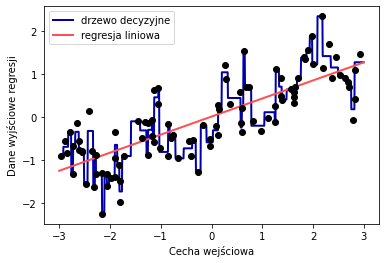

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="drzewo decyzyjne")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="regresja liniowa")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Dane wyjściowe regresji")
plt.xlabel("Cecha wejściowa")
plt.legend(loc="best")

In [12]:
from sklearn.preprocessing import KBinsDiscretizer

In [13]:
bins = np.linspace(-3, 3, 11)
print("przedziały: {}".format(bins))

przedziały: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [14]:
which_bin = np.digitize(X, bins=bins)
print("\nPunkty danych:\n", X[:5])
print("\nPrzynależność punktów danych do przedziałów:\n", which_bin[:5])


Punkty danych:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]

Przynależność punktów danych do przedziałów:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [15]:
from sklearn.preprocessing import OneHotEncoder
# przekształć przy użyciu OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# funkcja encoder.fit odnajduje unikalne wartości, które pojawiają się w which_bin
encoder.fit(which_bin)
# funkcja transform tworzy kodowanie jeden-z-N
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [16]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0.5, 0, 'Cecha wejściowa')

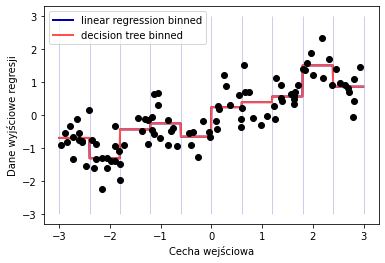

In [17]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Dane wyjściowe regresji")
plt.xlabel("Cecha wejściowa")


In [18]:
### Interakcje i wielomiany

In [19]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


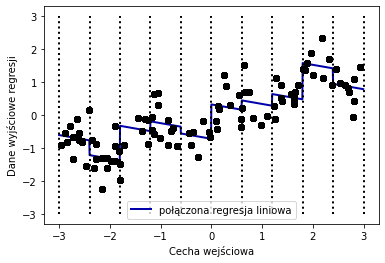

In [20]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='połączona regresja liniowa')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    plt.legend(loc="best")
    plt.ylabel("Dane wyjściowe regresji")
    plt.xlabel("Cecha wejściowa")
    plt.plot(X[:, 0], y, 'o', c='k')

In [21]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


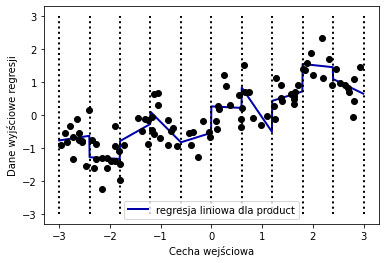

In [22]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='regresja liniowa dla product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Dane wyjściowe regresji")
plt.xlabel("Cecha wejściowa")
plt.legend(loc="best")

In [23]:
from sklearn.preprocessing import PolynomialFeatures
# dołącz wielomiany do x**10:
# użycie domyślnej wartości "include_bias=True" powoduje dodanie cechy, która stale wynosi 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [24]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [25]:
print("Wpisy X:\n{}".format(X[:5]))
print("Wpisy X_poly:\n{}".format(X_poly[:5]))

Wpisy X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
Wpisy X_poly:
[[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [26]:
print("Nazwy elementów wielomianowych:\n{}".format(poly.get_feature_names()))

Nazwy elementów wielomianowych:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


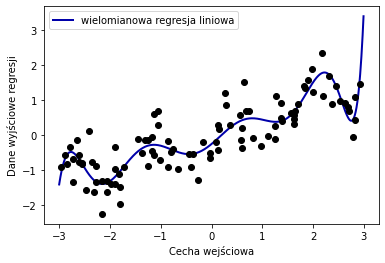

In [27]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='wielomianowa regresja liniowa')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Dane wyjściowe regresji")
plt.xlabel("Cecha wejściowa")
plt.legend(loc="best")

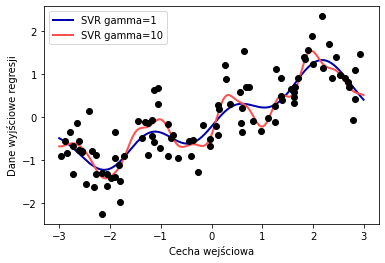

In [28]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Dane wyjściowe regresji")
plt.xlabel("Cecha wejściowa")
plt.legend(loc="best")

In [29]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
# przeskaluj dane
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [31]:
print("Nazwy elementów wielomianowych:\n{}".format(poly.get_feature_names()))

Nazwy elementów wielomianowych:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Wynik bez interakcji: {:.3f}".format(
ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Wynik z interakcjami: {:.3f}".format(
ridge.score(X_test_poly, y_test)))

Wynik bez interakcji: 0.621
Wynik z interakcjami: 0.753


In [33]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Wynik bez interakcji: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Wynik z interakcjami: {:.3f}".format(rf.score(X_test_poly, y_test)))

Wynik bez interakcji: 0.795
Wynik z interakcjami: 0.762


In [34]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [35]:
print("Liczba wystąpień cechy:\n{}".format(np.bincount(X[:, 0])))

Liczba wystąpień cechy:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Wartość')

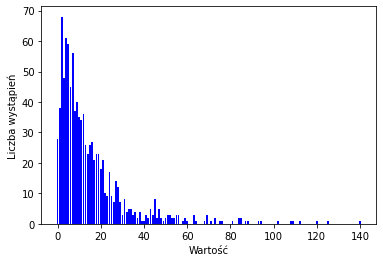

In [36]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Liczba wystąpień")
plt.xlabel("Wartość")

In [37]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Wynik na zestawie testowym: {:.3f}".format(score))


Wynik na zestawie testowym: 0.622


In [38]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)


Text(0.5, 0, 'Wartość')

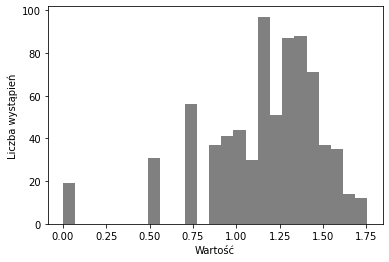

In [39]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Liczba wystąpień")
plt.xlabel("Wartość")


In [40]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Wynik na zestawie testowym: {:.3f}".format(score))


Wynik na zestawie testowym: 0.875


In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# uzyskaj deterministyczne liczby losowe
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# dodaj cechy szumu do danych
# pierwsze 30 cech pochodzi ze zbioru danych, następne 50 to szum
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# aby wybrać 50% cech, użyj f_classif (wartość domyślna) i SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# przekształcić zestaw uczący
X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

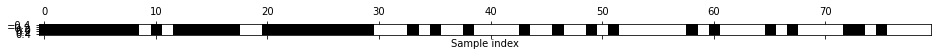

In [42]:
mask = select.get_support()
print(mask)
# wyświetl maskę, kolor czarny oznacza wartość True, biały oznacza wartość False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")


In [43]:
from sklearn.linear_model import LogisticRegression
# przekształć dane testowe
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Wynik z wszystkimi cechami: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Wynik wyłącznie z wybranymi cechami: {:.3f}".format(lr.score(X_test_selected, y_test)))


Wynik z wszystkimi cechami: 0.919
Wynik wyłącznie z wybranymi cechami: 0.919


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")


In [45]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))


X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'Indeks próbki')

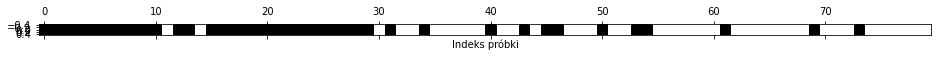

In [46]:
mask = select.get_support()
# wyświetl maskę — kolor czarny oznacza wartość True a biały False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks próbki")


In [47]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Wynik na zestawie testowym: {:.3f}".format(score))


Wynik na zestawie testowym: 0.930


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0, 'Indeks próbki')

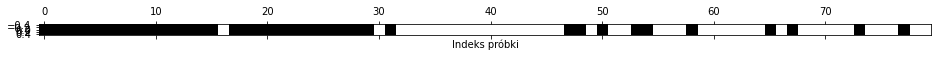

In [48]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
# utwórz wykres z wybranymi cechami:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Indeks próbki")


In [49]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Wynik na zestwie testowym: {:.3f}".format(score))


Wynik na zestwie testowym: 0.930


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print("Wynik na zestwie testowym: {:.3f}".format(select.score(X_test, y_test)))

Wynik na zestwie testowym: 0.951


In [51]:
citibike = mglearn.datasets.load_citibike()

In [52]:
print("Dane Citi Bike:\n{}".format(citibike.head()))

Dane Citi Bike:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Wypożyczenia')

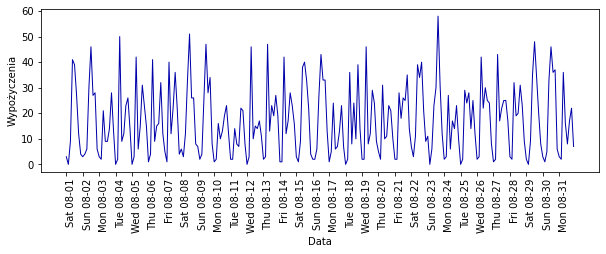

In [54]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Data")
plt.ylabel("Wypożyczenia")


In [62]:
# wyodrębnij wartości docelowe (liczbę wypożyczeń)
y = citibike.values
# konwertuj czas na czas POSIX używając "% s"
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

Text(0, 0.5, 'Wypożyczenia')

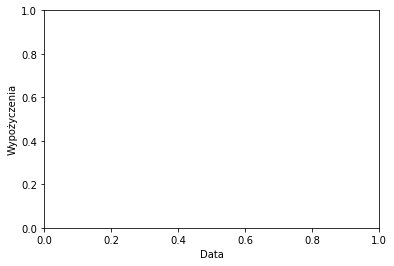

In [65]:
# użyj pierwszych 184 punktów danych do uczenia, a resztę do testów
n_train = 184
# funkcja do obliczenia i wykreślenia regresora na danym zestawie funkcji
def eval_on_features(features, target, regressor):
    # podziel dane funkcje na zbiór uczący i testowy
    X_train, X_test = features[:n_train], features[n_train:]
    # podziel również tablicę docelową
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Zestaw testowy R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="dane uczące")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="dane testowe")
    plt.plot(range(n_train), y_pred_train, '--', label="prognoza dla uczących")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prognoza dla testowych")
    plt.legend(loc=(1.01, 0))
plt.xlabel("Data")
plt.ylabel("Wypożyczenia")


Zestaw testowy R^2: -0.04


<Figure size 432x288 with 0 Axes>

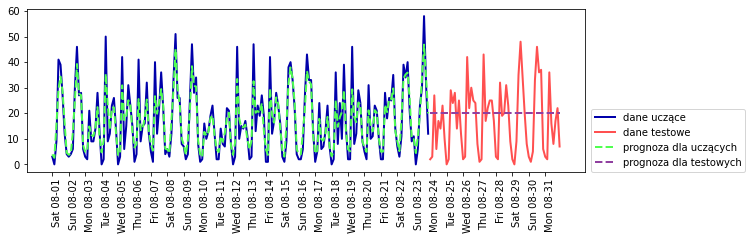

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

Zestaw testowy R^2: 0.60


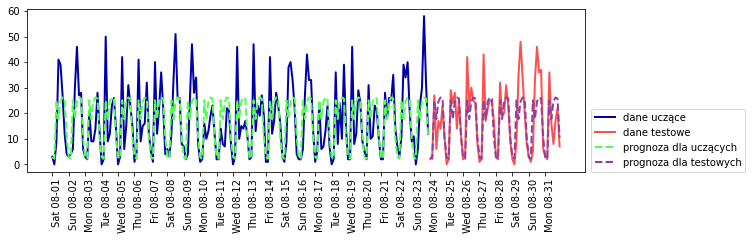

In [68]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Zestaw testowy R^2: 0.84


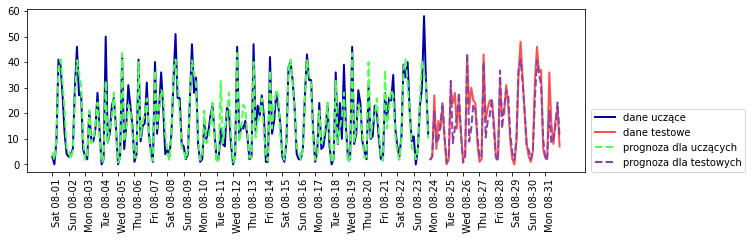

In [72]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Zestaw testowy R^2: 0.13


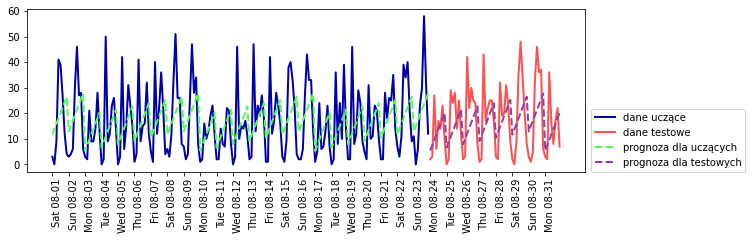

In [73]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())


In [74]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()


Zestaw testowy R^2: 0.62


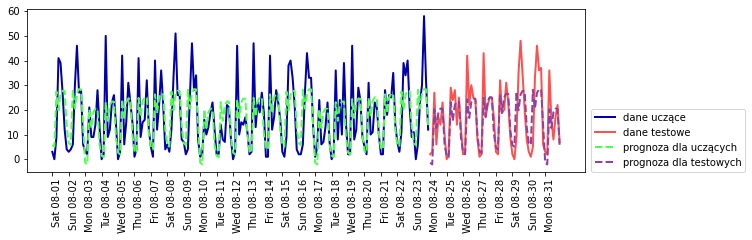

In [75]:
eval_on_features(X_hour_week_onehot, y, Ridge())

Zestaw testowy R^2: 0.85


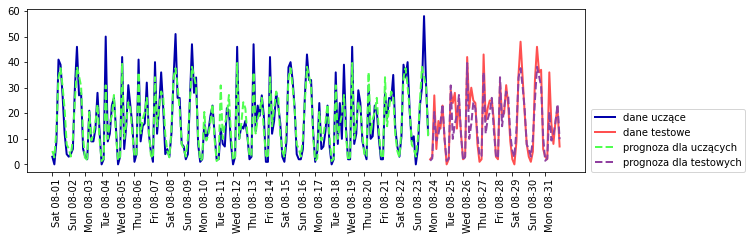

In [77]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)


In [78]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Po", "Wt", "Śr", "Cz", "Pi", "So", "Ni"]
features = day + hour


In [79]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]


Text(0, 0.5, 'Cecha')

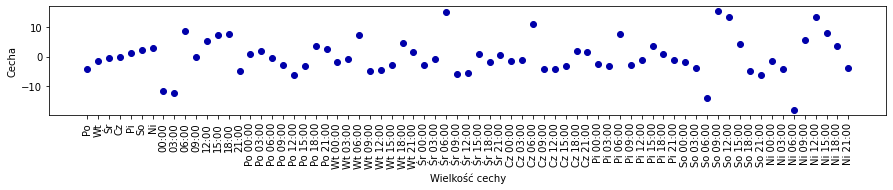

In [80]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Wielkość cechy")
plt.ylabel("Cecha")
